# Step 1.Warm Up

In [1]:
import tensorflow as tf
hello =tf.constant('Hello, TensorFlow!')
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [2]:
tf.constant(hello)

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, TensorFlow!'>

tf.constant() tells the shape and dtype type of the attribute


# Step2. Implement OCR codein Tensorflow

In [3]:
mnist =tf.keras.datasets.mnist

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Q1- Use same method that explain in lecture to show first 6 elements of the dataset. You should see:

In [5]:
import numpy as np

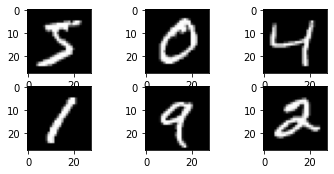

In [6]:
import matplotlib.pyplot as plt
# plot 6 images as gray scale
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Q2- Normalize the data by dividing the values by 255

In [7]:
X_train = X_train / 255
X_test = X_test / 255


Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it.

In [8]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(10)
])

We can run this model on our training data and see the result of the network. For each example
the model returns a vector of "logits" or "log-odds" scores, one for each class.


In [9]:
predictions= model(X_train[:1]).numpy()
predictions

array([[ 1.5540724 ,  0.5586928 ,  1.0132761 ,  0.38486832, -0.10130762,
        -0.19210285, -0.26674607,  0.2142789 , -0.79172564, -0.06454234]],
      dtype=float32)

Now is the time to define the loss function. We use a cross entropy as the loss function. 


In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


This loss is equal to the negative log probability of the true class: It is zero if the model is sure of the correct class. This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3. We can see this by typing:

In [11]:
loss_fn(y_train[:1], predictions).numpy()


2.9538445

Next step is to design the model and start training

In [12]:
model.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 987us/step - loss: 1.8126 - accuracy: 0.5657
Epoch 2/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.7659 - accuracy: 0.8435
Epoch 3/5
1875/1875 [==============================] - 2s 985us/step - loss: 0.5531 - accuracy: 0.8668
Epoch 4/5
1875/1875 [==============================] - 2s 996us/step - loss: 0.4665 - accuracy: 0.8807
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.8898


You may see slightly different results because we did not initialize the weights and biases the same way.

# Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy). 

In [13]:
model2 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),  #adding one more layer with 128 nodes
 tf.keras.layers.Dense(10)
])

In [14]:
predictions= model2(X_train[:1]).numpy()
predictions
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


1.8124843

In [15]:
model2.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10) #changing epochs to 10

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2625 - accuracy: 0.2189
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8611 - accuracy: 0.5878
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1640 - accuracy: 0.7197
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.8284 - accuracy: 0.78 - 2s 1ms/step - loss: 0.8273 - accuracy: 0.7875
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6497 - accuracy: 0.8274
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5462 - accuracy: 0.8560
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4755 - accuracy: 0.8734
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4366 - accuracy: 0.8824
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4057 - accuracy: 0.8902
Epoch 10/10
1875/1875 [=================

Use following command on your training section. This will consider 20% of your data for
validation:


In [16]:
hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8967 - val_loss: 0.3363 - val_accuracy: 0.9070
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3560 - accuracy: 0.8996 - val_loss: 0.3274 - val_accuracy: 0.9080
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3462 - accuracy: 0.9021 - val_loss: 0.3198 - val_accuracy: 0.9103
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.9039 - val_loss: 0.3135 - val_accuracy: 0.9127
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3303 - accuracy: 0.9058 - val_loss: 0.3060 - val_accuracy: 0.9130
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.9073 - val_loss: 0.3008 - val_accuracy: 0.9160
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3173 - accuracy: 0.9095 - val_loss: 0.2951 - val_accuracy:

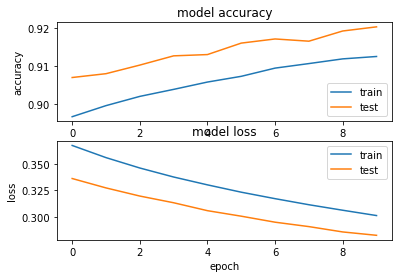

In [17]:
#Learning curve
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

As we discussed, dropout can help to overcome the overfitting. In following code we add the dropout to the model. 

In [18]:
model3 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10)])


# Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?


In [19]:
predictions= model3(X_train[:1]).numpy()
predictions
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.4894085

In [20]:
model3.compile(optimizer='SGD',
 loss=loss_fn,
 metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=200) #adding batchsize to 200

Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 2.3981 - accuracy: 0.1070
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 2.3146 - accuracy: 0.1237
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 2.2818 - accuracy: 0.1469
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 2.2505 - accuracy: 0.1718
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 2.2072 - accuracy: 0.2090
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 2.1594 - accuracy: 0.2539
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 2.0920 - accuracy: 0.3064
Epoch 8/10
300/300 [==============================] - 1s 2ms/step - loss: 2.0164 - accuracy: 0.3568
Epoch 9/10
300/300 [==============================] - 1s 2ms/step - loss: 1.9225 - accuracy: 0.4057
Epoch 10/10
300/300 [==============================] - 1s 2ms/step - loss: 1.8151 - accuracy: 0.4503

Accuracy decreased upto 41%


# Step3. Structured data


For this part, we will use a small dataset. In this dataset, the diagnostic, binary-valued variable
investigated is whether the patient shows signs of diabetes according to World Health Organization
criteria (i.e., if the 2 hour post-load plasma glucose was at least 200 mg/dl at any survey
examination or if found during routine medical care). The population lives near Phoenix, Arizona,
USA.
Attribute Information:
 0. Patient ID
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. Class variable (0 or 1)
 

In [21]:
import pandas as pd
file = 'C:/Padhai Ka samaan/535 ML-2/lecture6/pima-indians-diabetes.csv'
dataframe = pd.read_csv(file)
dataframe.head()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [22]:
dataframe.describe()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#Identifying input & output
y = dataframe['diabete']
X = dataframe.drop(['ID','diabete'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
random_state=1234)


# Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer. 


We don’t expect a good accuracy from this example. That is one of the issues with NN. We need more data to create an accurate model.

In [38]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [40]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(8,)), #left with 8 attributes after dropping 2 attributes
 tf.keras.layers.Dense(12, activation='sigmoid'),
 tf.keras.layers.Dense(8, activation='sigmoid'),
 tf.keras.layers.Dense(1)
])


In [42]:
#Using Adam as optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 17ms/step - loss: 5.7776 - accuracy: 0.6254 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 5.1639 - accuracy: 0.6652 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 4.9518 - accuracy: 0.6790 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 4.9462 - accuracy: 0.6793 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 5.8411 - accuracy: 0.6213 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 5.6935 - accuracy: 0.6309 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 5.3630 - accuracy: 0.6523 - val_loss: 5.5089 - val_accuracy: 0.6429
Epoch 8/10
20/20 [=

In [48]:
#Using 10% of data
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=10)


Epoch 1/10
18/18 [==============================] - 0s 15ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 2/10
18/18 [==============================] - 0s 10ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 3/10
18/18 [==============================] - 0s 8ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 4/10
18/18 [==============================] - 0s 9ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 7/10
18/18 [==============================] - 0s 8ms/step - loss: 5.2814 - accuracy: 0.6576 - val_loss: 5.9709 - val_accuracy: 0.6129
Epoch 8/10
18/18 [

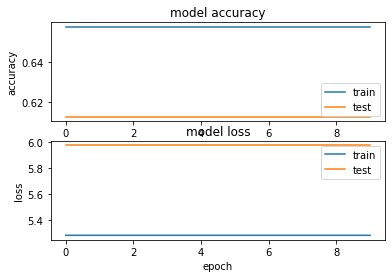

In [50]:
#Learning curve
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
model01 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(8,)),
 tf.keras.layers.Dense(12, activation='sigmoid'),
 tf.keras.layers.Dense(8, activation='sigmoid'),
 tf.keras.layers.Dropout(0.1),
 tf.keras.layers.Dense(1)
])

In [53]:
#Using Adam as optimizer
model01.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model01.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test), epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 23ms/step - loss: 1.3818 - accuracy: 0.6125 - val_loss: 0.6420 - val_accuracy: 0.6494
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.9773 - accuracy: 0.6340 - val_loss: 0.6309 - val_accuracy: 0.6688
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.8934 - accuracy: 0.6648 - val_loss: 0.6252 - val_accuracy: 0.6688
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 1.2586 - accuracy: 0.6533 - val_loss: 0.6196 - val_accuracy: 0.6688
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 1.0885 - accuracy: 0.6085 - val_loss: 0.6211 - val_accuracy: 0.6818
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 1.0978 - accuracy: 0.6482 - val_loss: 0.6176 - val_accuracy: 0.6883
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9912 - accuracy: 0.6185 - val_loss: 0.6068 - val_accuracy: 0.6753
Epoch 8/10
20/20 [